In [ ]:
! pip install -q kaggle

In [1]:
from google.colab import files
files.upload()

MessageError: TypeError: Cannot read properties of undefined (reading 'next')

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! kaggle datasets list

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2050        197  1.0              
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data               763KB  2023-11-21 17:56:32           9327        162  1.0              
thedrcat/daigt-proper-train-dataset                    DAIGT Proper Train Dataset                  119MB  2023-11-05 14:03:25           1885        153  1.0              
thedevastator/books-sales-and-ratings                  Books Sales and Ratings                      53KB  2023-12-06 04:54:33           2286     

In [ ]:
!kaggle datasets download -d muhammetzahitaydn/hardhat-vest-dataset-v3

... resuming from 1793064960 bytes (2724253435 bytes left) ...
100% 4.19G/4.21G [00:27<00:00, 202MB/s]
100% 4.21G/4.21G [00:27<00:00, 98.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('hardhat-vest-dataset-v3.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!nvidia-smi

Mon Dec 18 07:01:18 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!mv  "/content/labels/test" "/content/datasets/test_temp"
!mv "/content/labels/train" "/content/datasets/train_temp"
!mv "/content/labels/val" "/content/datasets/val_temp"



In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.8/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="muWGKapIz74zBYTx75OO")
project = rf.workspace("tahir-cjhnb").project("hard-hat-sample-lx78t")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.198, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Hard-Hat-Sample-1 in yolov8:: 100%|██████████| 211/211 [00:00<00:00, 5399.62it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=100 imgsz=640 patience=50

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=Fa

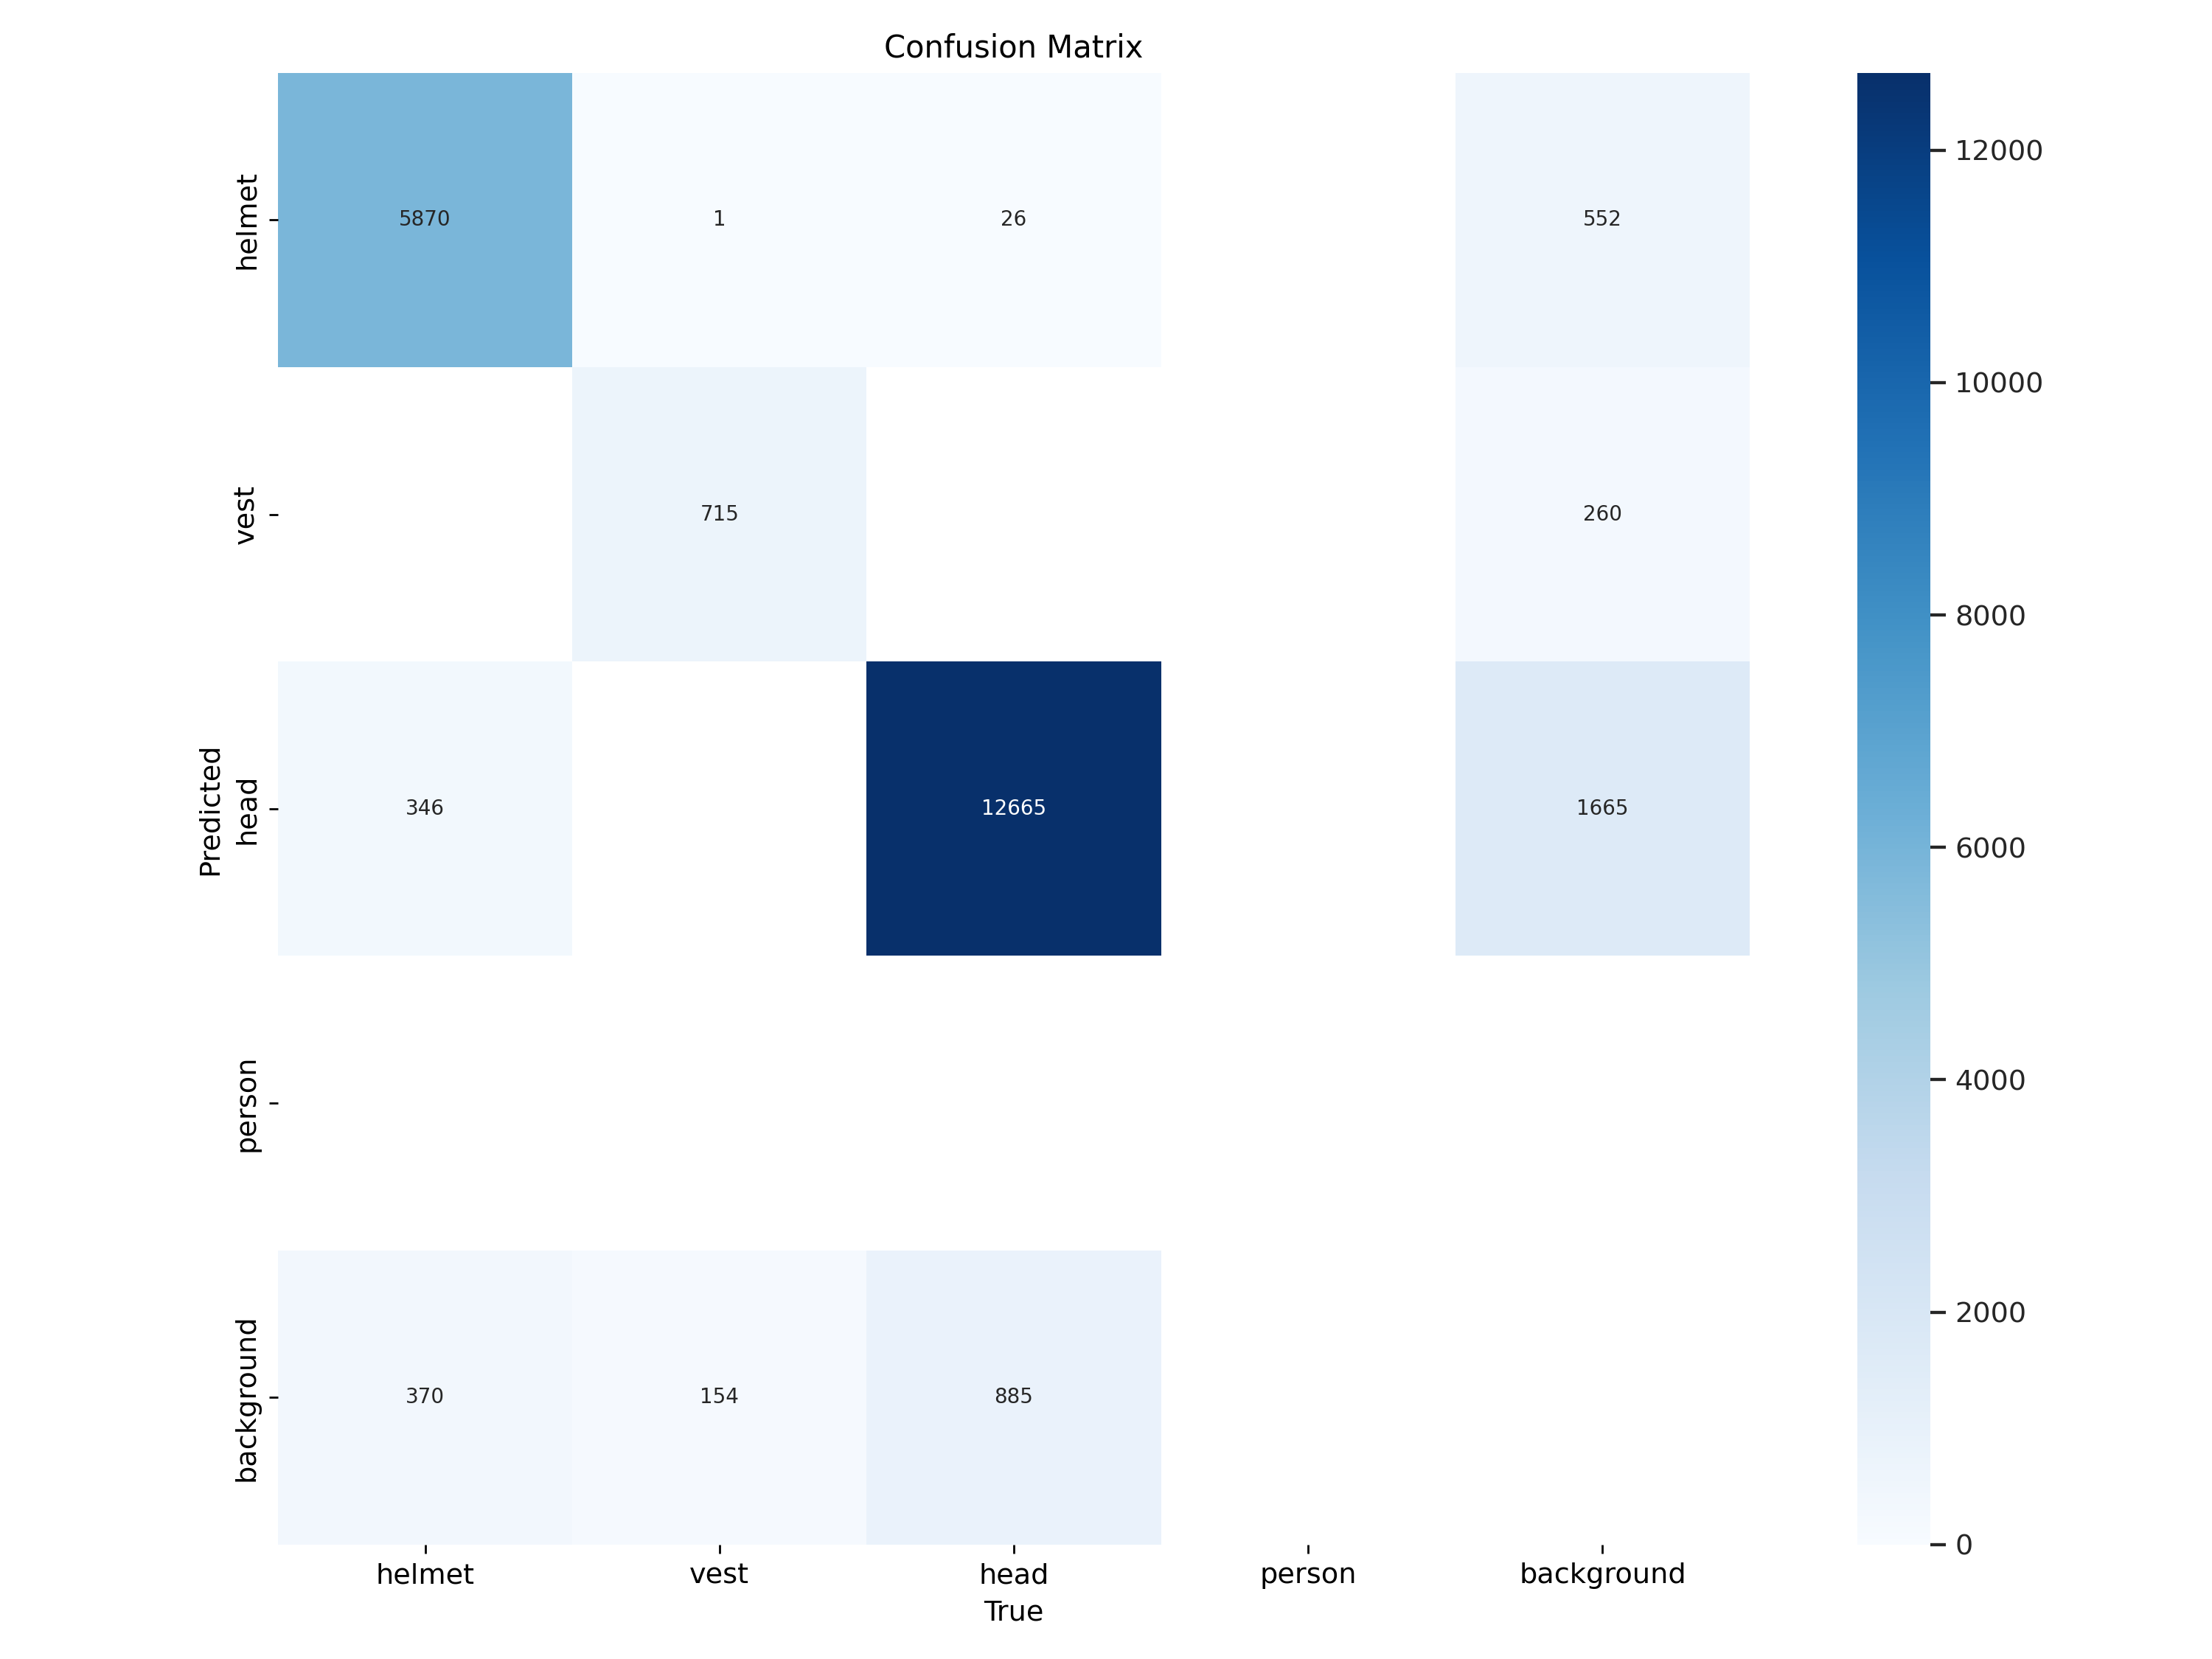

In [ ]:
Image(filename=f'runs/detect/train2/confusion_matrix.png', width=600)

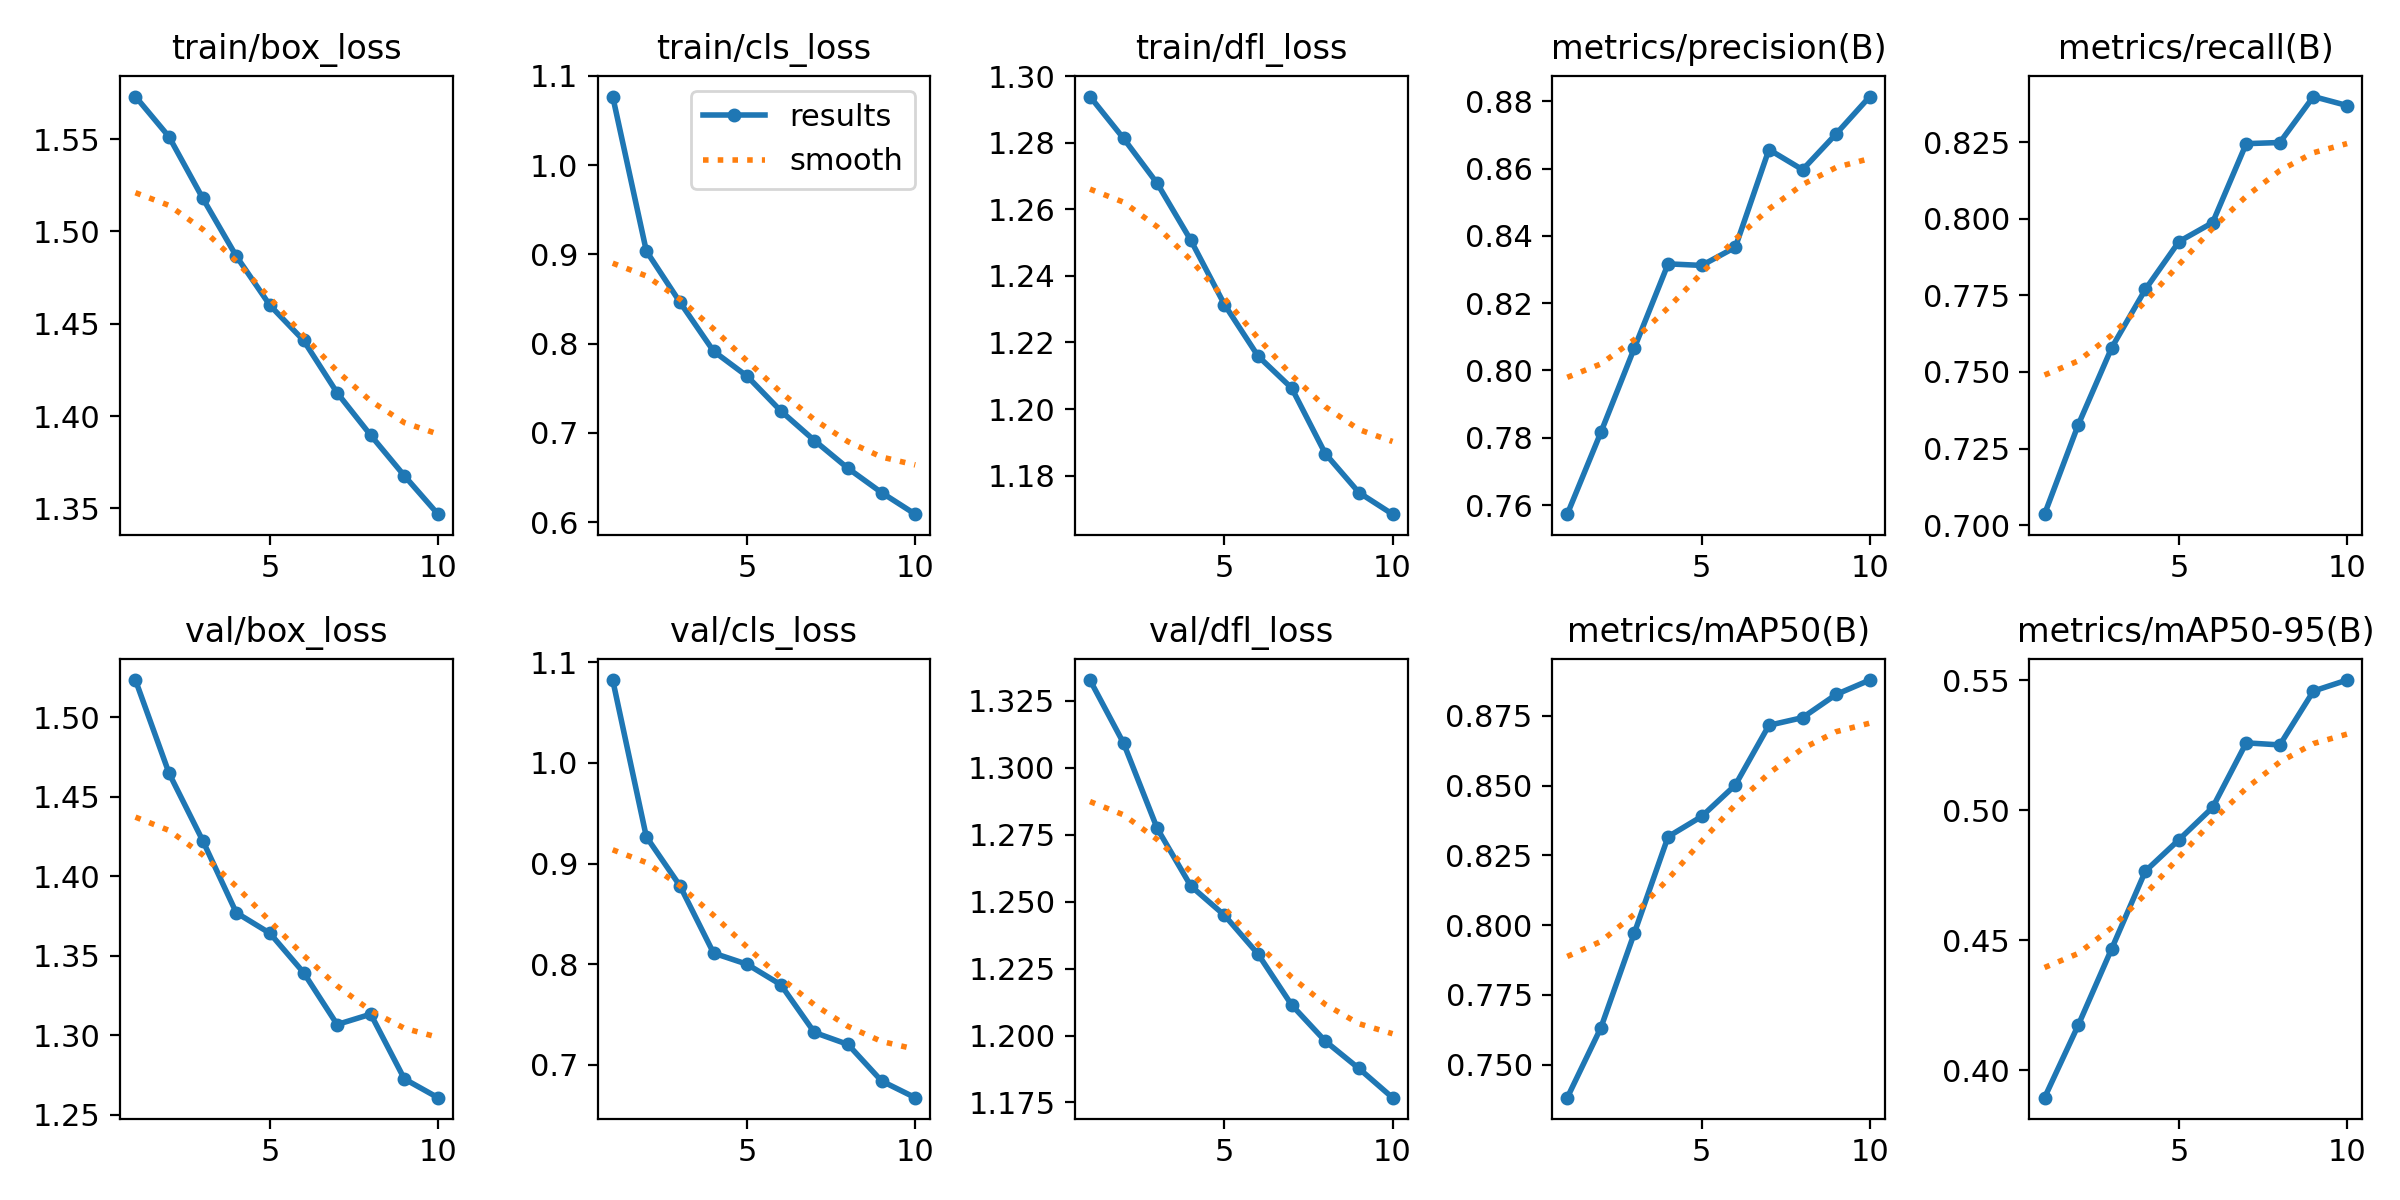

In [ ]:
Image(filename=f'runs/detect/train2/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/val/labels.cache... 2438 images, 1 backgrounds, 0 corrupt: 100% 2438/2438 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 153/153 [01:08<00:00,  2.22it/s]
                   all       2438      21032      0.882      0.837      0.888      0.551
                helmet       2438       6586      0.933      0.866      0.923      0.611
                  vest       2438        870      0.811      0.746       0.83      0.547
                  head       2438      13576      0.901      0.898      0.911      0.494
Speed: 0.8ms preprocess, 19.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.5 source=/content/datasets/test/images

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/2455 /content/datasets/test/images/000009.jpg: 640x640 1 helmet, 37.0ms
image 2/2455 /content/datasets/test/images/000010.jpg: 640x640 5 helmets, 4 vests, 37.0ms
image 3/2455 /content/datasets/test/images/000021.jpg: 640x640 1 helmet, 1 vest, 35.5ms
image 4/2455 /content/datasets/test/images/000022.jpg: 640x640 7 helmets, 34.7ms
image 5/2455 /content/datasets/test/images/000034.jpg: 640x640 1 helmet, 34.7ms
image 6/2455 /content/datasets/test/images/000036.jpg: 640x640 1 helmet, 30.6ms
image 7/2455 /content/datasets/test/images/000056.jpg: 640x640 7 heads, 24.1ms
image 8/2455 /content/datasets/test/images/000079.jpg: 640x640 1 helmet, 24.2ms
image 9/2455 /content/datasets/test/images/000097.jpg: 640x640 1 helmet, 24.1ms
image 10/2455 /content/datasets/test/images/000104.jpg: 640x640 4 helmets, 1 head, 24.2ms
im

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.75 source='mixp.mp4' show=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs

video 1/1 (1/848) /content/mixp.mp4: 384x640 2 helmets, 108.2ms
video 1/1 (2/848) /content/mixp.mp4: 384x640 2 helmets, 44.2ms
video 1/1 (3/848) /content/mixp.mp4: 384x640 2 helmets, 39.7ms
video 1/1 (4/848) /content/mixp.mp4: 384x640 2 helmets, 34.3ms
video 1/1 (5/848) /content/mixp.mp4: 384x640 2 helmets, 34.3ms
video 1/1 (6/848) /content/mixp.mp4: 384x640 2 helmets, 34.2ms
video 1/1 (7/848) /content/mixp.mp4: 384x640 2 helmets, 33.9ms
video 1/1 (8/848) /content/mixp.mp4: 384x640 2 helmets, 34.8ms
video 1/1 (9/848) /content/mixp.mp4: 384x640 2 helmets, 33.4ms
video 1/1 (10/848) /content/mixp.mp4: 384x640 2 helmets, 34.2ms
video 1/1 (11/848) /content/mixp.mp4: 384x640 2 helmets, 33.7ms
video 1/1 (12/848) /content/mixp.mp4: 384x640 2 helmets, 32

In [ ]:
names:
- helmet
- vest
- head
- person
nc: 4
path: "/content/datasets"
test: "../test/images"
train: "../train/images"
val: "../val/images"